In [ ]:
!pip install numpy-financial

In [ ]:
import pandas as pd
import numpy as np
import numpy_financial as npf
import matplotlib.pyplot as plt
from ipywidgets import interact, widgets
from IPython.display import display, clear_output
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import pandas as pd

file_path = "/content/Flujos_de_caja.csv"

# 1) Lee usando el separador correcto y la codificación adecuada
df = pd.read_csv(file_path, sep=';', encoding='latin1', engine='python')

# 2) Comprueba que tengas ya las 12 columnas separadas
print("Columnas tras leer:", df.columns.tolist())

# 3) (Opcional) Normaliza nombres: quita espacios, BOMs y renombra tildes/guiones
df.columns = (
    df.columns
      .str.strip()
      .str.replace('\ufeff', '')      # elimina BOM si lo hubiera
      .str.replace('[–−]', '_', regex=True)  # sustituye guiones raros por '_'
)

# 4) Fija "Proyecto" como índice para que no entre en los cálculos numéricos
df.set_index("Proyecto", inplace=True)

# 5) Verifica
print("Columnas finales:", df.columns.tolist())
df.head()


Columnas tras leer: ['Proyecto', 'Inversion_Inicial', 'A\x96o_1', 'A\x96o_2', 'A\x96o_3', 'A\x96o_4', 'A\x96o_5', 'A\x96o_6', 'A\x96o_7', 'A\x96o_8', 'A\x96o_9', 'A\x96o_10']
Columnas finales: ['Inversion_Inicial', 'A\x96o_1', 'A\x96o_2', 'A\x96o_3', 'A\x96o_4', 'A\x96o_5', 'A\x96o_6', 'A\x96o_7', 'A\x96o_8', 'A\x96o_9', 'A\x96o_10']


,Inversion_Inicial,Ao_1,Ao_2,Ao_3,Ao_4,Ao_5,Ao_6,Ao_7,Ao_8,Ao_9,Ao_10
Proyecto,,,,,,,,,,,
Winston Smith,-85682867,5570451,16720657,7801445,18051670,15958457,12517201,5862839,20146580,19444292,24566746
Julia,-76755036,5967344,6490687,17913082,5955205,17184923,24685303,20474106,17186651,9233384,13512686
O'Brien,-76882282,16243667,18070601,16252748,15511699,20448040,5658139,15070853,13582851,17689154,18385842
Big Brother,-41081788,7412149,14311768,16953070,5966649,8775702,24747640,22841583,19143933,18412066,12835958
Don Quijote,-33315092,10398869,16991292,11839789,20617892,9090284,20860467,22012114,17840143,20194144,10923808


In [ ]:
# Revisamos valores nulos
print("Valores nulos por columna:\n", df.isnull().sum())

# Si es necesario, eliminamos o rellenamos
df = df.dropna()

Valores nulos por columna:
 Inversion_Inicial    0
Ao_1                0
Ao_2                0
Ao_3                0
Ao_4                0
Ao_5                0
Ao_6                0
Ao_7                0
Ao_8                0
Ao_9                0
Ao_10               0
dtype: int64


In [ ]:
print("Dimensiones del DataFrame:", df.shape)
print("\nResumen estadístico:")
display(df.describe())

print("\nNombres de columnas:")
print(df.columns)

print("\nPrimeras filas del dataset:")
display(df.head())

Dimensiones del DataFrame: (1000, 11)

Resumen estadístico:


,Inversion_Inicial,Ao_1,Ao_2,Ao_3,Ao_4,Ao_5,Ao_6,Ao_7,Ao_8,Ao_9,Ao_10
count,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,-6.011131e+07,1.491443e+07,1.543757e+07,1.494726e+07,1.508328e+07,1.499664e+07,1.452585e+07,1.474249e+07,1.507009e+07,1.500583e+07,1.493154e+07
std,2.326539e+07,5.670897e+06,5.730480e+06,5.745627e+06,5.854509e+06,5.835083e+06,5.823820e+06,5.783290e+06,5.863878e+06,5.864704e+06,5.829605e+06
min,-9.994527e+07,5.076218e+06,5.019675e+06,5.004138e+06,5.000917e+06,5.006464e+06,5.019156e+06,5.004677e+06,5.000037e+06,5.029882e+06,5.023382e+06
25%,-8.004509e+07,9.802492e+06,1.055513e+07,9.994844e+06,1.012155e+07,9.991937e+06,9.304432e+06,9.662194e+06,9.944576e+06,9.984148e+06,9.759860e+06
50%,-5.959744e+07,1.494401e+07,1.557866e+07,1.494062e+07,1.514997e+07,1.502767e+07,1.439013e+07,1.459236e+07,1.518330e+07,1.441793e+07,1.517991e+07
75%,-3.956041e+07,1.958610e+07,2.040920e+07,1.997789e+07,2.021412e+07,1.997109e+07,1.938830e+07,1.982090e+07,2.035117e+07,2.020567e+07,1.989067e+07
max,-2.006109e+07,2.499750e+07,2.499207e+07,2.497829e+07,2.499835e+07,2.499923e+07,2.497731e+07,2.496854e+07,2.494877e+07,2.499441e+07,2.498939e+07



Nombres de columnas:
Index(['Inversion_Inicial', 'Ao_1', 'Ao_2', 'Ao_3', 'Ao_4', 'Ao_5',
       'Ao_6', 'Ao_7', 'Ao_8', 'Ao_9', 'Ao_10'],
      dtype='object')

Primeras filas del dataset:


,Inversion_Inicial,Ao_1,Ao_2,Ao_3,Ao_4,Ao_5,Ao_6,Ao_7,Ao_8,Ao_9,Ao_10
Proyecto,,,,,,,,,,,
Winston Smith,-85682867,5570451,16720657,7801445,18051670,15958457,12517201,5862839,20146580,19444292,24566746
Julia,-76755036,5967344,6490687,17913082,5955205,17184923,24685303,20474106,17186651,9233384,13512686
O'Brien,-76882282,16243667,18070601,16252748,15511699,20448040,5658139,15070853,13582851,17689154,18385842
Big Brother,-41081788,7412149,14311768,16953070,5966649,8775702,24747640,22841583,19143933,18412066,12835958
Don Quijote,-33315092,10398869,16991292,11839789,20617892,9090284,20860467,22012114,17840143,20194144,10923808


In [ ]:
import pandas as pd

file_path = "/content/Flujos_de_caja.csv"

# Lee con separador punto y coma y la codificación adecuada
df = pd.read_csv(file_path, sep=';', encoding='latin1', engine='python')

# Verifica que tengas todas las columnas separadas
print("Columnas tras leer:", df.columns.tolist())

# Ahora sí puedes poner Proyecto como índice
df.set_index("Proyecto", inplace=True)

# Calcula el VPN
def calcular_vpn(fila, tasa=0.10):
    flujos = fila.values
    inversion_inicial = flujos[0]
    flujos_posteriores = flujos[1:]
    return -inversion_inicial + sum(cf/(1+tasa)**i for i, cf in enumerate(flujos_posteriores,1))

df["VPN"] = df.apply(calcular_vpn, axis=1)

df.head()



Columnas tras leer: ['Proyecto', 'Inversion_Inicial', 'A\x96o_1', 'A\x96o_2', 'A\x96o_3', 'A\x96o_4', 'A\x96o_5', 'A\x96o_6', 'A\x96o_7', 'A\x96o_8', 'A\x96o_9', 'A\x96o_10']


,Inversion_Inicial,Ao_1,Ao_2,Ao_3,Ao_4,Ao_5,Ao_6,Ao_7,Ao_8,Ao_9,Ao_10,VPN
Proyecto,,,,,,,,,,,,
Winston Smith,-85682867,5570451,16720657,7801445,18051670,15958457,12517201,5862839,20146580,19444292,24566746,1.698560e+08
Julia,-76755036,5967344,6490687,17913082,5955205,17184923,24685303,20474106,17186651,9233384,13512686,1.573244e+08
O'Brien,-76882282,16243667,18070601,16252748,15511699,20448040,5658139,15070853,13582851,17689154,18385842,1.739405e+08
Big Brother,-41081788,7412149,14311768,16953070,5966649,8775702,24747640,22841583,19143933,18412066,12835958,1.292883e+08
Don Quijote,-33315092,10398869,16991292,11839789,20617892,9090284,20860467,22012114,17840143,20194144,10923808,1.296024e+08


In [ ]:
def calcular_tir(fila):
    flujos = fila.values
    return npf.irr(flujos)

df['TIR'] = df.apply(calcular_tir, axis=1)
df.head()

,Inversion_Inicial,Ao_1,Ao_2,Ao_3,Ao_4,Ao_5,Ao_6,Ao_7,Ao_8,Ao_9,Ao_10,VPN,TIR
Proyecto,,,,,,,,,,,,,
Winston Smith,-85682867,5570451,16720657,7801445,18051670,15958457,12517201,5862839,20146580,19444292,24566746,1.698560e+08,0.181005
Julia,-76755036,5967344,6490687,17913082,5955205,17184923,24685303,20474106,17186651,9233384,13512686,1.573244e+08,0.190429
O'Brien,-76882282,16243667,18070601,16252748,15511699,20448040,5658139,15070853,13582851,17689154,18385842,1.739405e+08,0.235040
Big Brother,-41081788,7412149,14311768,16953070,5966649,8775702,24747640,22841583,19143933,18412066,12835958,1.292883e+08,0.337211
Don Quijote,-33315092,10398869,16991292,11839789,20617892,9090284,20860467,22012114,17840143,20194144,10923808,1.296024e+08,0.448268


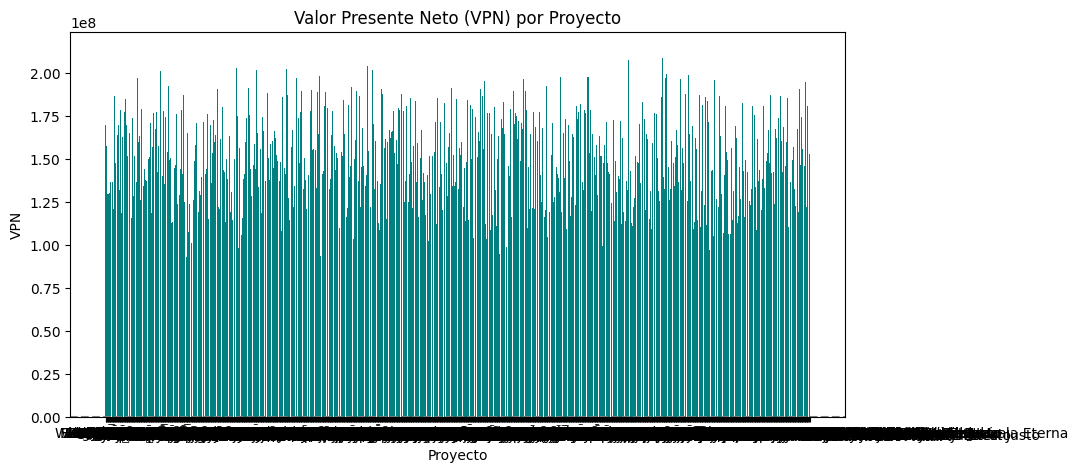

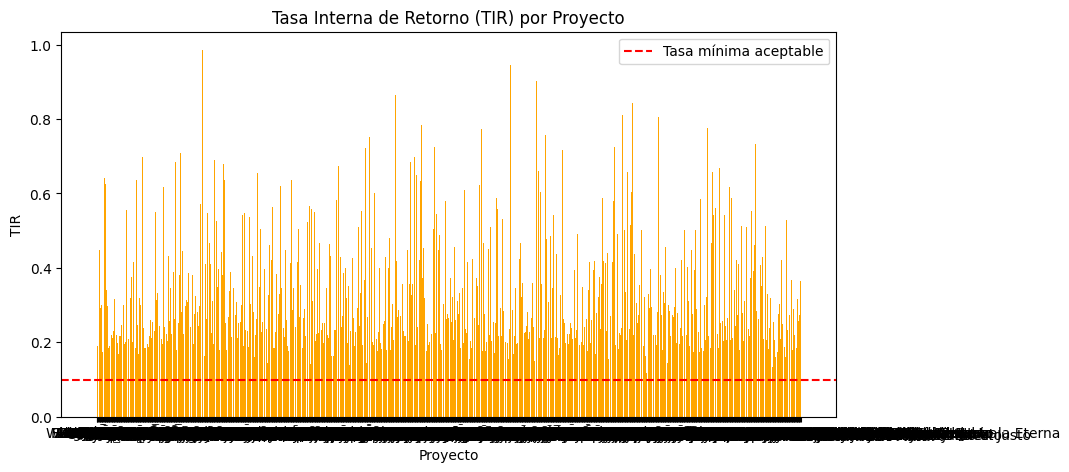

In [ ]:
# Gráfico de VPN
plt.figure(figsize=(10,5))
plt.bar(df.index, df['VPN'], color='teal')
plt.title("Valor Presente Neto (VPN) por Proyecto")
plt.xlabel("Proyecto")
plt.ylabel("VPN")
plt.axhline(0, color='gray', linestyle='--')
plt.show()

# Gráfico de TIR
plt.figure(figsize=(10,5))
plt.bar(df.index, df['TIR'], color='orange')
plt.title("Tasa Interna de Retorno (TIR) por Proyecto")
plt.xlabel("Proyecto")
plt.ylabel("TIR")
plt.axhline(0.10, color='red', linestyle='--', label='Tasa mínima aceptable')
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy_financial as npf
import matplotlib.pyplot as plt
import ipywidgets as widgets
from IPython.display import display, clear_output

# ——————————————————————————————
# 1) Carga y limpieza (ajusta ruta y encoding si es necesario)
file_path = "/content/Flujos_de_caja.csv"
df = pd.read_csv(file_path, sep=';', encoding='latin1', engine='python')
df.columns = df.columns.str.strip().str.replace('\ufeff','')  # limpia BOM
df.set_index("Proyecto", inplace=True)
df = df.dropna()
# ——————————————————————————————

# ——————————————————————————————
# 2) Funciones de cálculo
tasa_descuento = 0.10

def calcular_vpn(fila, tasa=tasa_descuento):
    flujos = fila.values
    inversion = flujos[0]
    posteriores = flujos[1:]
    return -inversion + sum(cf / (1+tasa)**i for i, cf in enumerate(posteriores,1))

def calcular_tir(fila):
    try:
        return npf.irr(fila.values)
    except:
        return float('nan')

def calcular_vpn_tir():
    df['VPN'] = df.apply(calcular_vpn, axis=1)
    df['TIR'] = df.apply(calcular_tir, axis=1)
# ——————————————————————————————

# ——————————————————————————————
# 3) Menú interactivo
def display_menu():
    clear_output()
    print("Selecciona una opción:")

    b_v = widgets.Button(description="Visualizar Datos")
    b_c = widgets.Button(description="Calcular VPN/TIR")
    b_g = widgets.Button(description="Graficar Resultados")
    b_s = widgets.Button(description="Salir")

    out = widgets.Output(layout={'border':'1px solid lightgray'})

    def on_v(b):
        with out:
            clear_output()
            print("📊 Datos:")
            display(df.head(), df.describe())

    def on_c(b):
        with out:
            clear_output()
            print("🧮 Calculando VPN y TIR...")
            calcular_vpn_tir()
            display(df[['VPN','TIR']])

    def on_g(b):
        with out:
            clear_output()
            if 'VPN' not in df.columns or 'TIR' not in df.columns:
                print("⚠️ Primero pulsa ‘Calcular VPN/TIR’")
            else:
                # VPN
                plt.figure(figsize=(10,5))
                plt.bar(df.index, df['VPN'], color='teal')
                plt.title("VPN por Proyecto")
                plt.xlabel("Proyecto"); plt.ylabel("VPN")
                plt.axhline(0, color='gray', linestyle='--')
                plt.show()
                # TIR
                plt.figure(figsize=(10,5))
                plt.bar(df.index, df['TIR'], color='orange')
                plt.title("TIR por Proyecto")
                plt.xlabel("Proyecto"); plt.ylabel("TIR")
                plt.axhline(0.10, color='red', linestyle='--', label='Tasa mínima aceptable')
                plt.legend()
                plt.show()

    def on_s(b):
        clear_output()
        print("👋 Saliendo del programa...")

    b_v.on_click(on_v)
    b_c.on_click(on_c)
    b_g.on_click(on_g)
    b_s.on_click(on_s)

    display(widgets.VBox([widgets.HBox([b_v, b_c, b_g, b_s]), out]))

# Lanza el menú
display_menu()


Selecciona una opción:


from matplotlib import pyplot as plt
_df_0['VPN'].plot(kind='hist', bins=20, title='VPN')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['TIR'].plot(kind='hist', bins=20, title='TIR')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2.plot(kind='scatter', x='VPN', y='TIR', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['VPN'].plot(kind='line', figsize=(8, 4), title='VPN')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_4['TIR'].plot(kind='line', figsize=(8, 4), title='TIR')
plt.gca().spines[['top', 'right']].set_visible(False)